# **11.Word Embeddings**

---


Word embeddings are a fundamental concept in natural language processing (NLP) and machine learning. They are a way to represent words or phrases as dense vectors of real numbers in a continuous vector space. These word vectors capture semantic and syntactic information about words, making them useful for a wide range of NLP tasks. Popular techniques for generating word embeddings are Word2Vec and GloVe.




# **11.1 Word2Vec**


Word2Vec is a computer technique that turns words into numbers in a way that captures their meaning. It does this by looking at the words that often appear together in sentences. For example, it knows that "cat" and "dog" are similar because they often show up in similar sentences. It represents each word as a special set of numbers called a vector. When you look at these vectors in a chart, words with similar meanings are grouped close to each other. This helps computers understand the meaning of words and find similar words more easily.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
corpus = ['রাজা খুব শক্তিশালী মানুষ',
'রাণী একজন জ্ঞানী মহিলা',
'বালিকাটি তরূনী মহিলা',
'মানুষটি শক্তিশালী',
'শিক্ষক দেশ হয় দেশ গড়ার কারিগর',
'তানিম ভালো ছেলে']

Here Just for simplicity,we use a simple corpus and the `stop_word` instead of using `bnltk` or `banglanltk` libraries.

In [ ]:
def remove_stop_words(corpus):
    stop_words = ['খুব', 'হয়', 'একজন']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))

    return results

In [ ]:
corpus=remove_stop_words(corpus)

In [ ]:
corpus

['রাজা শক্তিশালী মানুষ',
 'রাণী জ্ঞানী মহিলা',
 'বালিকাটি তরূনী মহিলা',
 'মানুষটি শক্তিশালী',
 'শিক্ষক দেশ দেশ গড়ার কারিগর',
 'তানিম ভালো ছেলে']

In [ ]:
#just split the every word from the corpus

words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [ ]:
words

{'কারিগর',
 'গড়ার',
 'ছেলে',
 'জ্ঞানী',
 'তরূনী',
 'তানিম',
 'দেশ',
 'বালিকাটি',
 'ভালো',
 'মহিলা',
 'মানুষ',
 'মানুষটি',
 'রাজা',
 'রাণী',
 'শক্তিশালী',
 'শিক্ষক'}

# Let's generate the data.Here the steps:

**1.Create a mapping of words to integers (word2int):**


```
word2int = {}

for i, word in enumerate(words):
    word2int[word] = i

```
**2.Split the corpus into sentences:**



```
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

```
**3.Set the window size for generating context words (WINDOW_SIZE):**


```
WINDOW_SIZE = 2

```
**4.Generate training data pairs (data) using skip-gram approach:**


```
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                data.append([word, neighbor])

```
5.Convert the data into a DataFrame using Pandas:
**bold text**

```
import pandas as pd
df = pd.DataFrame(data, columns=['input', 'label'])
```
**6.Print the original sentences in the corpus:**


```
for text in corpus:
    print(text)

```








In [ ]:
#All step together
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] :
            if neighbor != word:
                data.append([word, neighbor])

In [ ]:
#first 200 row of Dataframe
df.head(200)

,input,label
0,রাজা,শক্তিশালী
1,রাজা,মানুষ
2,শক্তিশালী,রাজা
3,শক্তিশালী,মানুষ
4,মানুষ,রাজা
5,মানুষ,শক্তিশালী
6,রাণী,জ্ঞানী
7,রাণী,মহিলা
8,জ্ঞানী,রাণী
9,জ্ঞানী,মহিলা


In [ ]:
#shape of the dataframe
df.shape

(38, 2)

In [ ]:
word2int

#This will show you the mapping of words to integers as it was created in the earlier part of your code.

{'গড়ার': 0,
 'কারিগর': 1,
 'মানুষ': 2,
 'মহিলা': 3,
 'রাণী': 4,
 'শক্তিশালী': 5,
 'ভালো': 6,
 'বালিকাটি': 7,
 'দেশ': 8,
 'মানুষটি': 9,
 'ছেলে': 10,
 'তরূনী': 11,
 'তানিম': 12,
 'রাজা': 13,
 'শিক্ষক': 14,
 'জ্ঞানী': 15}

Lets setting up a Word2Vec model using TensorFlow.
Here's the  step of code:

**1. Define Constants:**


```
ONE_HOT_DIM = len(words)
```
**2.Define One-Hot Encoding Function:**


```
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

```
**3.Convert Data to One-Hot Encoding:**


```
X = []  # input word
Y = []  # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))

X_train = np.asarray(X)
Y_train = np.asarray(Y)

```
**4.Define TensorFlow Placeholders:**


```
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

```
**5.Define Word Embedding Parameters:**


```
EMBEDDING_DIM = 2
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x, W1), b1)

```
**6.Define Output Layer Parameters:**


```
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2), b2))

```
**7.Define Loss Function (Cross Entropy):**

```
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

```
**8.Define Training Operation (Gradient Descent):**


```
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

```






In [ ]:

import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)




In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [ ]:
#In this TensorFlow session, initializes global variables, and then runs a loop for training the Word2Vec model.

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.2423842
iteration 3000 loss is :  1.2848393
iteration 6000 loss is :  1.0866096
iteration 9000 loss is :  1.0442833
iteration 12000 loss is :  1.026435
iteration 15000 loss is :  1.0167489
iteration 18000 loss is :  1.0105013


In [ ]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-3.249842    1.1523733 ]
 [-2.8073838   1.4390626 ]
 [ 2.9229815  -0.5922208 ]
 [-0.4357503  -0.73935264]
 [-3.9223845  -3.7972467 ]
 [ 3.2523618  -3.372972  ]
 [ 2.001776    2.9383264 ]
 [-0.60079587 -3.3941488 ]
 [-2.6887527   4.211313  ]
 [ 4.080836    0.81615335]
 [ 2.0061827   2.9446194 ]
 [ 1.0831959  -5.6142583 ]
 [ 0.59693825  4.8071203 ]
 [ 3.2426646  -0.6837564 ]
 [-4.947054    0.02393772]
 [-2.3172867  -3.4445202 ]]


In [ ]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
words = list(words)
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,গড়ার,-3.249842,1.152373
1,কারিগর,-2.807384,1.439063
2,মানুষ,2.922982,-0.592221
3,মহিলা,-0.435750,-0.739353
4,রাণী,-3.922385,-3.797247
5,শক্তিশালী,3.252362,-3.372972
6,ভালো,2.001776,2.938326
7,বালিকাটি,-0.600796,-3.394149
8,দেশ,-2.688753,4.211313
9,মানুষটি,4.080836,0.816153


Let's Plot this Word2Vec Model

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2455 (\N{BENGALI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2524 (\N{BENGALI LETTER RRA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyl

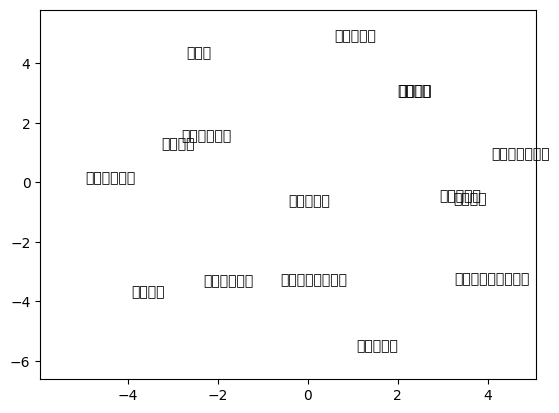

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

source of above Word2Vec and model :https://www.kaggle.com/code/tanim1/word2vec-bangla?fbclid=IwAR3Int5Uw3vhPEAV4FvWpRxvVGi5oFl7qkESP_zNgDT8xY18M78HAM2arHI